In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import datetime

In [2]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2023, 7, 31)

In [3]:
#tickers = ['GOOGL', 'AAPL', 'TSLA']

In [12]:
tickers = 'TSLA'

In [5]:
df = yf.download(tickers, start, end)

[*********************100%***********************]  1 of 1 completed


In [6]:
#Inicio do período
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


Código das empresas ações tickers = ['NASDAQ:AAPL','NASDAQ:MSFT','NYSE:GE','NYSE:IBM','NYSE:AA','NYSE:DAL','NYSE:UAL', 'NYSE:PEP', 'NYSE:KO']

In [7]:
#Final do período
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200
2023-07-27,268.309998,269.130005,255.300003,255.710007,255.710007,103697300
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [9]:
#df.rename(columns ={'GOOGL': 'GOOGLE', 'AAPL': 'APPLE' , 'TSLA':'TESLA'}, inplace=True)

In [10]:
df.sort_index(axis=1).drop(['Date', 'Adj Close'], axis=1)

,Close,High,Low,Open,Volume
0,14.620667,14.883333,14.217333,14.858000,71466000
1,14.006000,14.433333,13.810667,14.303333,80527500
2,14.085333,14.280000,13.614000,14.004000,93928500
3,14.063333,14.318667,13.985333,14.223333,44526000
4,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...
2152,269.059998,269.850006,254.119995,255.850006,136508500
2153,265.279999,272.899994,265.000000,272.380005,112757300
2154,264.350006,268.040009,261.750000,263.250000,95856200
2155,255.710007,269.130005,255.300003,268.309998,103697300


In [17]:
tickers = {'TSLA': 'TESLA'}

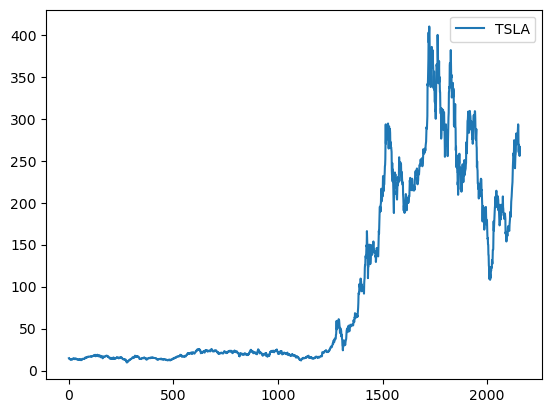

In [15]:
plt.plot(df.Close)
plt.legend(tickers)

In [25]:
df.shape


(2157, 7)

In [26]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2152    208.845499
2153    209.470599
2154    210.205099
2155    210.784300
2156    211.510600
Name: Close, Length: 2157, dtype: float64

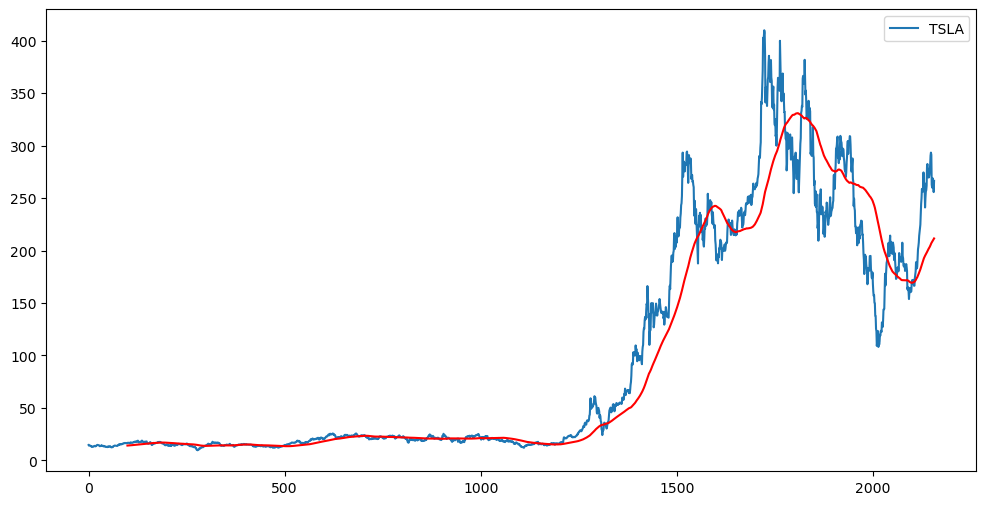

In [29]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.legend(tickers)

In [30]:
ma200 = df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2152    208.845499
2153    209.470599
2154    210.205099
2155    210.784300
2156    211.510600
Name: Close, Length: 2157, dtype: float64

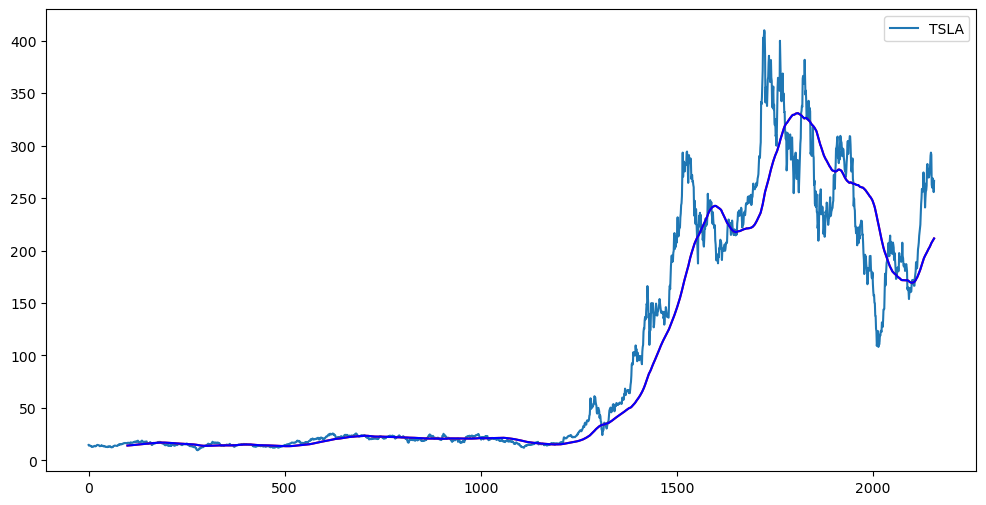

In [31]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'b')
plt.legend(tickers)

In [32]:
df.shape

(2157, 7)

In [33]:
# Splitting Data into Train and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1509, 1)
(648, 1)


In [34]:
data_training.head()

,Close
0,14.620667
1,14.006000
2,14.085333
3,14.063333
4,14.041333


In [35]:
data_testing.head()

,Close
1509,231.593338
1510,235.223328
1511,243.256668
1512,245.036667
1513,251.993332


In [36]:
#Dimensionalizar em uma mesma escala de dados para treinamento e teste

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02270565],
       [0.01993798],
       [0.02029519],
       ...,
       [0.95012499],
       [0.95300672],
       [0.95645884]])

In [38]:
data_training_array.shape

(1509, 1)

In [39]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)                                       

In [40]:
x_train.shape

(1409, 100, 1)

ML Model :  Deep Learning

In [41]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [42]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [44]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 30)

Epoch 1/30
45/45 [==============================] - 27s 397ms/step - loss: 0.0115
Epoch 2/30
45/45 [==============================] - 18s 391ms/step - loss: 0.0074
Epoch 3/30
45/45 [==============================] - 19s 425ms/step - loss: 0.0025
Epoch 4/30
45/45 [==============================] - 16s 361ms/step - loss: 0.0020
Epoch 5/30
45/45 [==============================] - 13s 293ms/step - loss: 0.0019
Epoch 6/30
45/45 [==============================] - 18s 392ms/step - loss: 0.0026
Epoch 7/30
45/45 [==============================] - 16s 344ms/step - loss: 0.0024
Epoch 8/30
45/45 [==============================] - 18s 397ms/step - loss: 0.0025
Epoch 9/30
45/45 [==============================] - 16s 351ms/step - loss: 0.0021
Epoch 10/30
45/45 [==============================] - 18s 390ms/step - loss: 0.0021
Epoch 11/30
45/45 [==============================] - 14s 309ms/step - loss: 0.0024
Epoch 12/30
45/45 [==============================] - 16s 358ms/step - loss: 0.0024
Epoch 13/30
4

In [45]:
model.save('keras_model.h5')

In [46]:
data_testing.head()

,Close
1509,231.593338
1510,235.223328
1511,243.256668
1512,245.036667
1513,251.993332


In [47]:
data_testing.tail(100)

,Close
2057,187.710007
2058,182.000000
2059,172.919998
2060,173.440002
2061,174.479996
...,...
2152,269.059998
2153,265.279999
2154,264.350006
2155,255.710007


In [68]:
past_100_days = data_training.tail(100)

In [69]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Vinicius\AppData\Local\Temp\ipykernel_14564\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [70]:
final_df.head()

,Close
0,96.847336
1,94.571335
2,91.625999
3,103.650665
4,108.066666


In [71]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01640155],
       [0.00925205],
       [0.        ],
       [0.03777255],
       [0.05164434],
       [0.05786612],
       [0.09659362],
       [0.10736813],
       [0.10557553],
       [0.13139666],
       [0.14148006],
       [0.13398713],
       [0.13590119],
       [0.16308981],
       [0.18101174],
       [0.17570301],
       [0.23396287],
       [0.20959719],
       [0.18061385],
       [0.13834303],
       [0.15019602],
       [0.05793733],
       [0.09570569],
       [0.10100394],
       [0.10244892],
       [0.15155724],
       [0.18311637],
       [0.17473967],
       [0.1555466 ],
       [0.17514805],
       [0.18272894],
       [0.1563843 ],
       [0.11044866],
       [0.11822851],
       [0.13869901],
       [0.1532116 ],
       [0.15098134],
       [0.16138934],
       [0.18144106],
       [0.14681391],
       [0.15790254],
       [0.14565166],
       [0.15750466],
       [0.15815385],
       [0.16661433],
       [0.17530512],
       [0.17985994],
       [0.195

In [72]:
input_data.shape

(748, 1)

In [73]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [74]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(648, 100, 1)
(648,)


In [75]:
# Making Predictions

y_predicted = model.predict(x_test)

21/21 [==============================] - 2s 78ms/step


In [76]:
y_predicted.shape

(648, 1)

In [77]:
y_test

array([0.43967324, 0.45107597, 0.47631074, 0.48190218, 0.50375484,
       0.5666428 , 0.6336353 , 0.56156443, 0.60161544, 0.60681949,
       0.59696635, 0.57723927, 0.59649518, 0.60267301, 0.5969559 ,
       0.59868355, 0.63445206, 0.63684989, 0.61702857, 0.58694574,
       0.54307293, 0.59153204, 0.62606486, 0.60711264, 0.6021913 ,
       0.60453679, 0.61625371, 0.60163634, 0.55489453, 0.56205659,
       0.56672659, 0.54588959, 0.5479104 , 0.5366333 , 0.530267  ,
       0.46032176, 0.4439244 , 0.48913752, 0.42652182, 0.41948544,
       0.4644368 , 0.43094055, 0.39613543, 0.36287999, 0.33828395,
       0.30168834, 0.41747503, 0.41169509, 0.44472017, 0.43857378,
       0.45345285, 0.42093039, 0.44703422, 0.39609354, 0.39788403,
       0.41372643, 0.40551731, 0.37212574, 0.38272225, 0.36002144,
       0.35225208, 0.37772767, 0.41155896, 0.40508798, 0.43576762,
       0.43636441, 0.41474211, 0.42817623, 0.42107701, 0.44721223,
       0.51039339, 0.47888655, 0.4858183 , 0.48679208, 0.46045

In [78]:
y_predicted 

array([[0.40805632],
       [0.4133907 ],
       [0.4186159 ],
       [0.42396757],
       [0.42963   ],
       [0.43577445],
       [0.4427247 ],
       [0.45096824],
       [0.4605422 ],
       [0.47139147],
       [0.48333845],
       [0.49605498],
       [0.5090656 ],
       [0.5219957 ],
       [0.5345704 ],
       [0.54654294],
       [0.55773973],
       [0.56820554],
       [0.57802945],
       [0.5872011 ],
       [0.5955585 ],
       [0.6027695 ],
       [0.60878026],
       [0.61379784],
       [0.617999  ],
       [0.6215196 ],
       [0.62447864],
       [0.6270229 ],
       [0.62921536],
       [0.6308989 ],
       [0.63195467],
       [0.63234764],
       [0.6320239 ],
       [0.63099205],
       [0.62927085],
       [0.6268982 ],
       [0.6236759 ],
       [0.6194049 ],
       [0.61417437],
       [0.6079516 ],
       [0.6007435 ],
       [0.5928168 ],
       [0.5843731 ],
       [0.5754787 ],
       [0.56607723],
       [0.55606145],
       [0.545268  ],
       [0.534

In [79]:
scaler.scale_

array([0.00314126])

In [80]:
scale_factor = 1 /0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

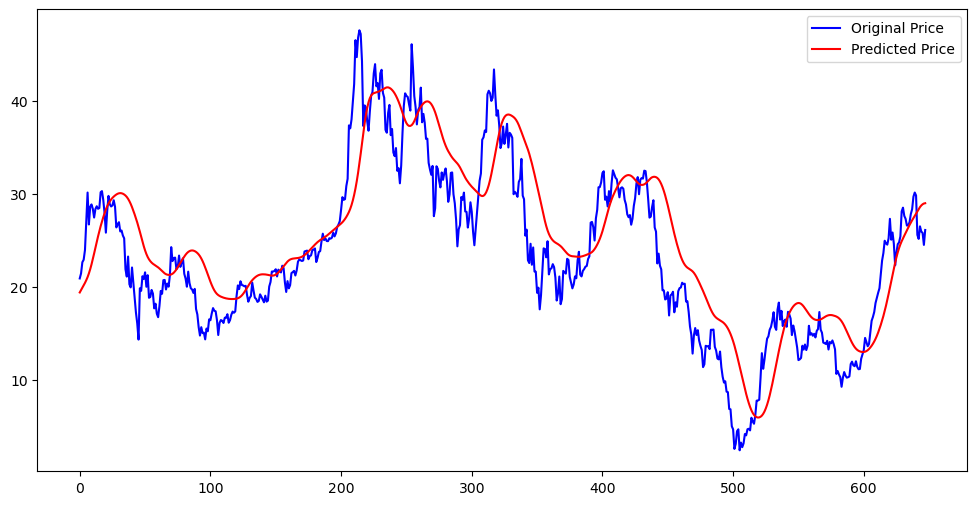

In [81]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel = ('Time')
plt.ylabel = ('Price')
plt.legend()
plt.show()         

In [82]:
from sklearn.metrics import accuracy_score, classification_report

In [88]:
acc = accuracy_score(y_test, y_predicted)
print(acc)

ValueError: continuous is not supported

In [ ]:
print(f"Relatório de Classificação: {classification_report(y_pred, y_predicted)}")